<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/R_for_Pharmacometrics/blob/main/Dose_PK_ExposureSingle_Ascxending_Dose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
def trapez(df):
  x = df["TIME"].to_list()
  y = df["LIDV"].to_list()
  area = np.trapz(y, x)

  return area

## Overview

This document contains exploratory plots for single ascending dose PK data as well as the Python code that generates these graphs. The plots presened here are based on simulated data form Novartis.


## Setup

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

from packaging import version
import sklearn
print(f"Sciket Learn version:   {sklearn.__version__}")
print(f"Lifelines version:      {sklearn.__version__}")
print(f"Sciket Survive version: {sklearn.__version__}")

from google.colab import drive
drive.mount('/content/drive/')

Sciket Learn version:   1.2.2
Lifelines version:      1.2.2
Sciket Survive version: 1.2.2
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Load Dataset

In [41]:
# load dataset
path = "/content/drive/MyDrive/Python_pharma/data/"

file = "Single_Ascending_Dose_Dataset2.csv"

pkpd_data = pd.read_csv(path+file)
pkpd_data.head(3)

,ID,TIME,NOMTIME,TIMEUNIT,AMT,LIDV,CMT,NAME,EVENTU,CENS,EVID,WEIGHTB,SEX,TRTACT,DOSE
0,1,-0.089,-0.1,Hours,0,NaN,2,PK Concentration,ng/mL,0,0,77.9,Male,100 mg,100
1,1,0.000,0.0,Hours,100,NaN,1,Dosing,mg,0,1,77.9,Male,100 mg,100
2,1,0.170,0.1,Hours,0,0.665,2,PK Concentration,ng/mL,0,0,77.9,Male,100 mg,100


In [42]:
#ensure dataset has all the necessary columns
pkpd_data["LIDV_NORM"] = pkpd_data["LIDV"] / pkpd_data["DOSE"]
pkpd_data["LIDV_UNIT"] = np.where(pkpd_data["CMT"] == 2, "ng/ml", "")

In [43]:
pkpd_data.head()

,ID,TIME,NOMTIME,TIMEUNIT,AMT,LIDV,CMT,NAME,EVENTU,CENS,EVID,WEIGHTB,SEX,TRTACT,DOSE,LIDV_NORM,LIDV_UNIT
0,1,-0.089,-0.1,Hours,0,NaN,2,PK Concentration,ng/mL,0,0,77.9,Male,100 mg,100,NaN,ng/ml
1,1,0.000,0.0,Hours,100,NaN,1,Dosing,mg,0,1,77.9,Male,100 mg,100,NaN,
2,1,0.170,0.1,Hours,0,0.665,2,PK Concentration,ng/mL,0,0,77.9,Male,100 mg,100,0.00665,ng/ml
3,1,0.565,0.5,Hours,0,0.997,2,PK Concentration,ng/mL,0,0,77.9,Male,100 mg,100,0.00997,ng/ml
4,1,1.145,1.0,Hours,0,1.350,2,PK Concentration,ng/mL,0,0,77.9,Male,100 mg,100,0.01350,ng/ml


In [44]:
# FILTER

# pkpd_data = pkpd_data[pkpd_data["ID"].isin([1,16])]
pkpd_data.shape

(700, 17)

In [45]:
pkpd_data = pkpd_data.sort_values("DOSE")
pkpd_data["TRTACT_low2high"] = pkpd_data["TRTACT"]
pkpd_data["TRTACT_high2low"] = pkpd_data["TRTACT"]
pkpd_data = pkpd_data[['ID', 'TIME', 'NOMTIME', 'TIMEUNIT', 'AMT', 'LIDV', 'CMT', 'NAME',
                        'EVENTU', 'CENS', 'EVID', 'WEIGHTB', 'SEX', 'DOSE',
                         'LIDV_NORM', 'LIDV_UNIT', 'TRTACT_low2high', 'TRTACT_high2low']]

In [46]:
pk_data = pkpd_data[pkpd_data["CMT"] == 2]
pk_data.shape

(650, 18)

In [47]:
pk_data.groupby(["ID", "DOSE"])
NCA = pk_data[pk_data['LIDV'].notna()]
NCA.shape

(600, 18)

In [48]:
#NCA= NCA[["ID", "TIME", "LIDV"]]
NCA = NCA.sort_values(["ID", "TIME"])
NCA.shape

df = pd.DataFrame()
df["AUC_last"] = NCA.groupby("ID").apply(trapez)

(600, 18)

In [49]:
def get_max(df):
  max = df["LIDV"].max()
  return max

df["C_max"] = NCA.groupby("ID").apply(get_max)
df

,AUC_last,C_max
ID,,
1,10.984329,1.350
2,14.164724,1.260
3,7.655013,0.763
4,8.668306,1.060
5,8.583599,1.040
6,28.145842,4.040
7,34.143571,4.260
8,29.406381,3.210
9,18.861058,3.520


In [50]:
def get_first(df, str):
  L = df[str].to_list()
  U = L[0]
  return U
df["SEX"]    = NCA.groupby("ID").apply(get_first, "SEX")
df["WEIGHTB"] = NCA.groupby("ID").apply(get_first, "WEIGHTB")
df["DOSE"] = NCA.groupby("ID").apply(get_first, "DOSE")
df["ID"] = NCA.groupby("ID").apply(get_first, "ID")
df = df.reset_index(drop=True)

df = df[["ID", "DOSE", "AUC_last", "C_max", "SEX", "WEIGHTB"]]

df
df2 = df[["ID", "DOSE", "SEX", "WEIGHTB"]]

df1 = df[["ID", "AUC_last", "C_max"]]
df1
df2

,ID,DOSE,AUC_last,C_max,SEX,WEIGHTB
0,1,100,10.984329,1.350,Male,77.9
1,2,100,14.164724,1.260,Male,74.7
2,3,100,7.655013,0.763,Male,99.5
3,4,100,8.668306,1.060,Male,106.0
4,5,100,8.583599,1.040,Male,106.0
5,6,100,28.145842,4.040,Female,67.4
6,7,100,34.143571,4.260,Female,53.7
7,8,100,29.406381,3.210,Female,52.5
8,9,100,18.861058,3.520,Female,97.1
9,10,100,16.416126,2.640,Female,91.6


,ID,AUC_last,C_max
0,1,10.984329,1.350
1,2,14.164724,1.260
2,3,7.655013,0.763
3,4,8.668306,1.060
4,5,8.583599,1.040
5,6,28.145842,4.040
6,7,34.143571,4.260
7,8,29.406381,3.210
8,9,18.861058,3.520
9,10,16.416126,2.640


,ID,DOSE,SEX,WEIGHTB
0,1,100,Male,77.9
1,2,100,Male,74.7
2,3,100,Male,99.5
3,4,100,Male,106.0
4,5,100,Male,106.0
5,6,100,Female,67.4
6,7,100,Female,53.7
7,8,100,Female,52.5
8,9,100,Female,97.1
9,10,100,Female,91.6


In [51]:
df1 = pd.melt(df1, id_vars=['ID'],
        value_vars=['AUC_last', 'C_max'], var_name='PARAM', value_name='VALUE',  ignore_index=False)

In [52]:
df1

,ID,PARAM,VALUE
0,1,AUC_last,10.984329
1,2,AUC_last,14.164724
2,3,AUC_last,7.655013
3,4,AUC_last,8.668306
4,5,AUC_last,8.583599
5,6,AUC_last,28.145842
6,7,AUC_last,34.143571
7,8,AUC_last,29.406381
8,9,AUC_last,18.861058
9,10,AUC_last,16.416126


In [53]:
df3 = df1.merge(df2, left_on='ID', right_on='ID')

In [59]:
df3["VALUE_NORM"] = df3["VALUE"]/df3["DOSE"]
df3.head(10)

,ID,PARAM,VALUE,DOSE,SEX,WEIGHTB,VALUE_NORM
0,1,AUC_last,10.984329,100,Male,77.9,0.109843
1,1,C_max,1.350000,100,Male,77.9,0.013500
2,2,AUC_last,14.164724,100,Male,74.7,0.141647
3,2,C_max,1.260000,100,Male,74.7,0.012600
4,3,AUC_last,7.655013,100,Male,99.5,0.076550
5,3,C_max,0.763000,100,Male,99.5,0.007630
6,4,AUC_last,8.668306,100,Male,106.0,0.086683
7,4,C_max,1.060000,100,Male,106.0,0.010600
8,5,AUC_last,8.583599,100,Male,106.0,0.085836
9,5,C_max,1.040000,100,Male,106.0,0.010400


## Provide an overview of the data

In [60]:
pk_data.head()

,ID,TIME,NOMTIME,TIMEUNIT,AMT,LIDV,CMT,NAME,EVENTU,CENS,EVID,WEIGHTB,SEX,DOSE,LIDV_NORM,LIDV_UNIT,TRTACT_low2high,TRTACT_high2low
0,1,-0.089,-0.1,Hours,0,NaN,2,PK Concentration,ng/mL,0,0,77.9,Male,100,NaN,ng/ml,100 mg,100 mg
102,8,0.947,1.0,Hours,0,3.11,2,PK Concentration,ng/mL,0,0,52.5,Female,100,0.0311,ng/ml,100 mg,100 mg
101,8,0.542,0.5,Hours,0,1.29,2,PK Concentration,ng/mL,0,0,52.5,Female,100,0.0129,ng/ml,100 mg,100 mg
100,8,0.091,0.1,Hours,0,0.55,2,PK Concentration,ng/mL,0,0,52.5,Female,100,0.0055,ng/ml,100 mg,100 mg
98,8,-0.061,-0.1,Hours,0,NaN,2,PK Concentration,ng/mL,0,0,52.5,Female,100,NaN,ng/ml,100 mg,100 mg


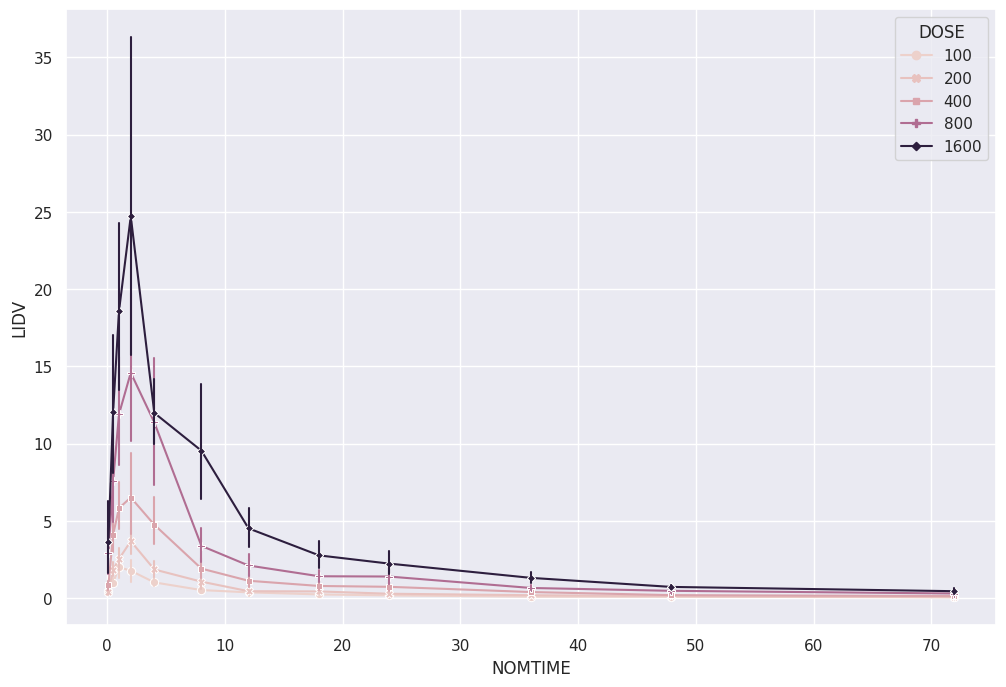

In [78]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,8)})
g_result = sns.lineplot(x="NOMTIME",
             y="LIDV",
             hue="DOSE",
             data=pk_data,
             style="DOSE",
             markers=True,
             dashes=False,
             err_style="bars",
             errorbar=("ci"))


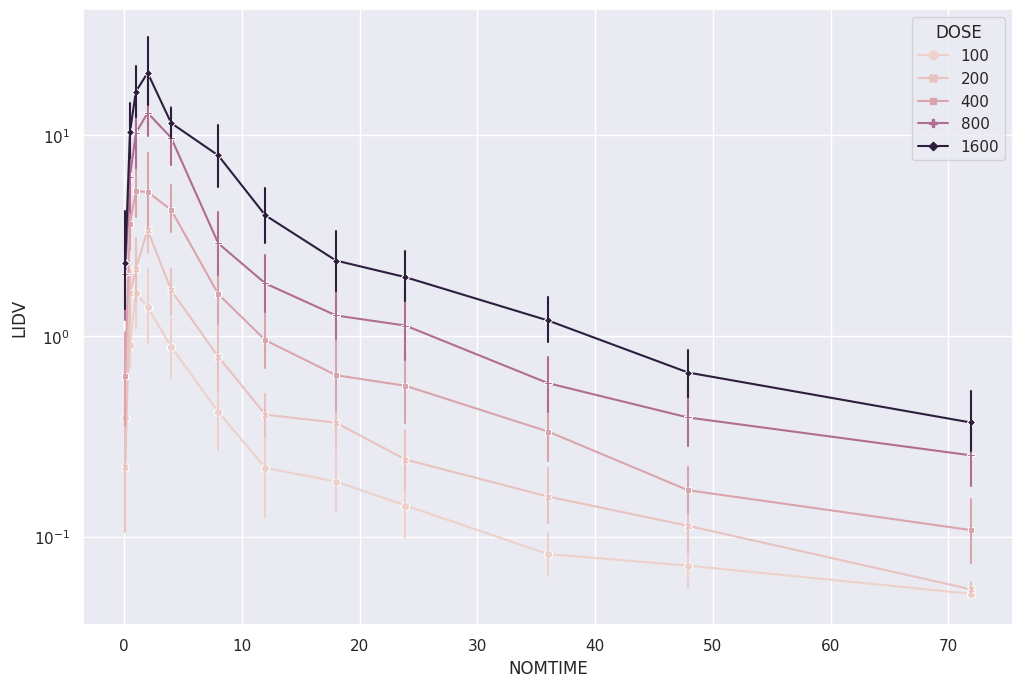

In [79]:
plt.yscale('log')
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,8)})
g_result = sns.lineplot(x="NOMTIME",
             y="LIDV",
             hue="DOSE",
             data=pk_data,
             style="DOSE",
             markers=True,
             dashes=False,
             err_style="bars",
             errorbar=("ci"))

## Concentration over time, faceted by Dose, mean +/- 95% CI, overlaid on gray spaghetti plots

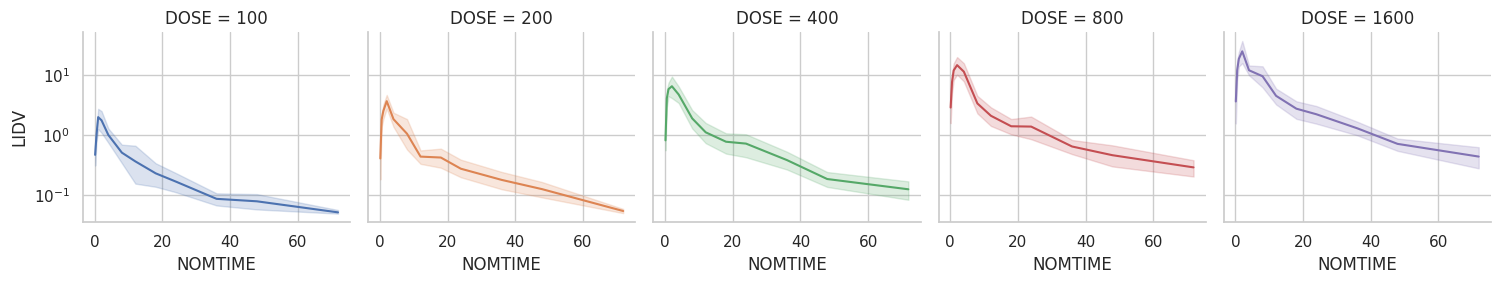

In [93]:

g = sns.FacetGrid(pk_data,
                  col="DOSE",
                  hue="DOSE",
                  col_wrap=5)
g.map(sns.lineplot, "NOMTIME","LIDV")
plt.yscale('log')
plt.show()

## Assess the dose linearity of exposure
Dose Normalized Concentration over time, colored by Dose, mean +/- 95% CI

In [94]:
pk_data.columns

Index(['ID', 'TIME', 'NOMTIME', 'TIMEUNIT', 'AMT', 'LIDV', 'CMT', 'NAME',
       'EVENTU', 'CENS', 'EVID', 'WEIGHTB', 'SEX', 'DOSE', 'LIDV_NORM',
       'LIDV_UNIT', 'TRTACT_low2high', 'TRTACT_high2low'],
      dtype='object')

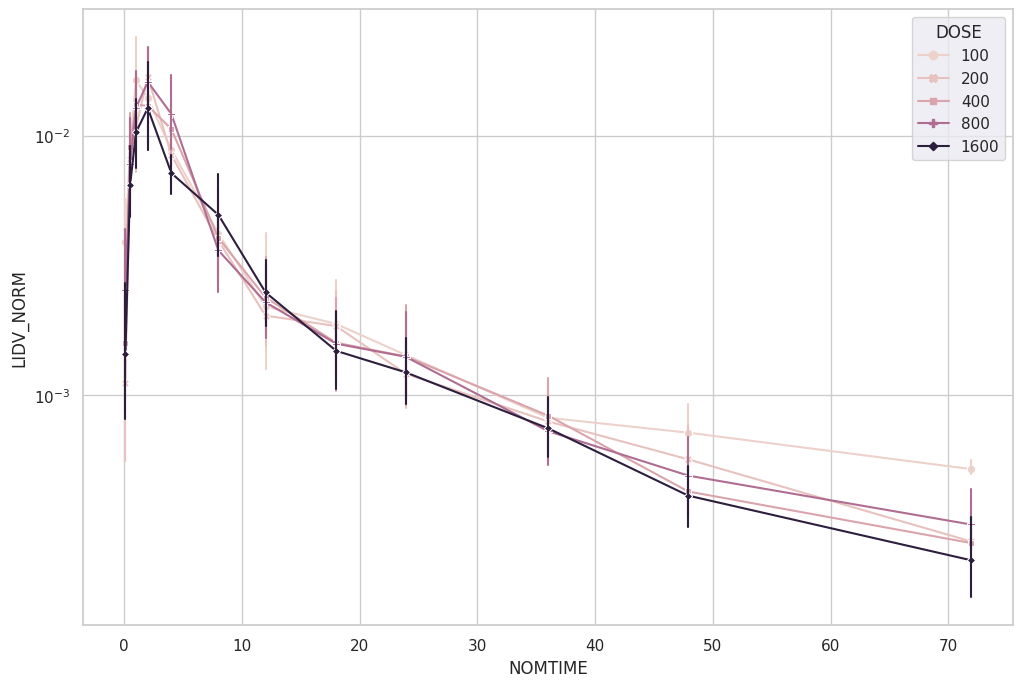

In [95]:
plt.yscale('log')
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,8)})
g_result = sns.lineplot(x="NOMTIME",
             y="LIDV_NORM",
             hue="DOSE",
             data=pk_data,
             style="DOSE",
             markers=True,
             dashes=False,
             err_style="bars",
             errorbar=("ci"))

## NCA of dose normalized AUC and Cmax vs Dose

Observe the dose normalized AUC and Cmax over different doses. Does the relationship appear to be constant across doses or do some doses stand out from the rest? Can you think of reasons why some would stand out? For example, the lowest dose may have dose normalized AUC much higher than the rest, could this be due to BLQ observations? If the highest doses have dose normalized AUC much higher than the others, could this be due to nonlinear clearance, with clearance saturating at higher doses? If the highest doses have dose normalized AUC much lower than the others, could there be saturation of bioavailability, reaching the maximum absorbable dose?

In [100]:
df3.columns
df3.head(4)

Index(['ID', 'PARAM', 'VALUE', 'DOSE', 'SEX', 'WEIGHTB', 'VALUE_NORM'], dtype='object')

,ID,PARAM,VALUE,DOSE,SEX,WEIGHTB,VALUE_NORM
0,1,AUC_last,10.984329,100,Male,77.9,0.109843
1,1,C_max,1.350000,100,Male,77.9,0.013500
2,2,AUC_last,14.164724,100,Male,74.7,0.141647
3,2,C_max,1.260000,100,Male,74.7,0.012600


<Axes: xlabel='DOSE', ylabel='VALUE_NORM'>

<Axes: xlabel='VALUE_NORM', ylabel='DOSE'>

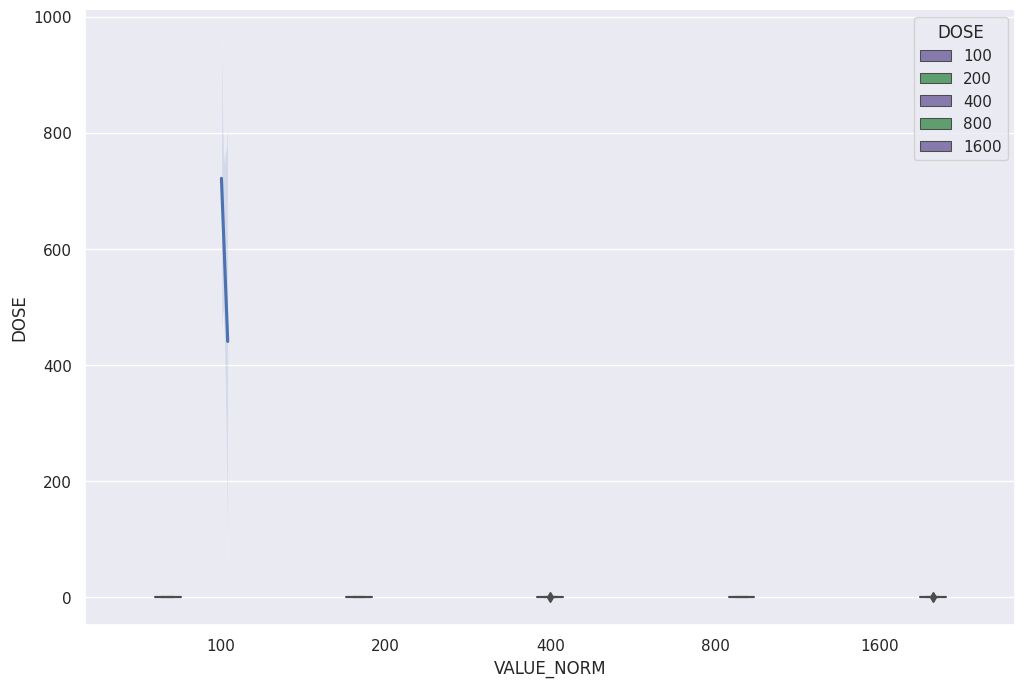

In [121]:
# Draw a nested boxplot to show bills by day and time
fig, ax = plt.subplots()
sns.boxplot(x="DOSE",
            y="VALUE_NORM",
            hue="DOSE",
            palette=["m", "g"],
            data = df3[df3["PARAM"]=="C_max"])
sns.regplot(x="VALUE_NORM",
            y="DOSE",
            data=df3[df3["PARAM"]=="C_max"], scatter=False)

In [116]:
d = df3[df3["PARAM"]=="C_max"]
d.head(10)

,ID,PARAM,VALUE,DOSE,SEX,WEIGHTB,VALUE_NORM
1,1,C_max,1.350,100,Male,77.9,0.01350
3,2,C_max,1.260,100,Male,74.7,0.01260
5,3,C_max,0.763,100,Male,99.5,0.00763
7,4,C_max,1.060,100,Male,106.0,0.01060
9,5,C_max,1.040,100,Male,106.0,0.01040
11,6,C_max,4.040,100,Female,67.4,0.04040
13,7,C_max,4.260,100,Female,53.7,0.04260
15,8,C_max,3.210,100,Female,52.5,0.03210
17,9,C_max,3.520,100,Female,97.1,0.03520
19,10,C_max,2.640,100,Female,91.6,0.02640


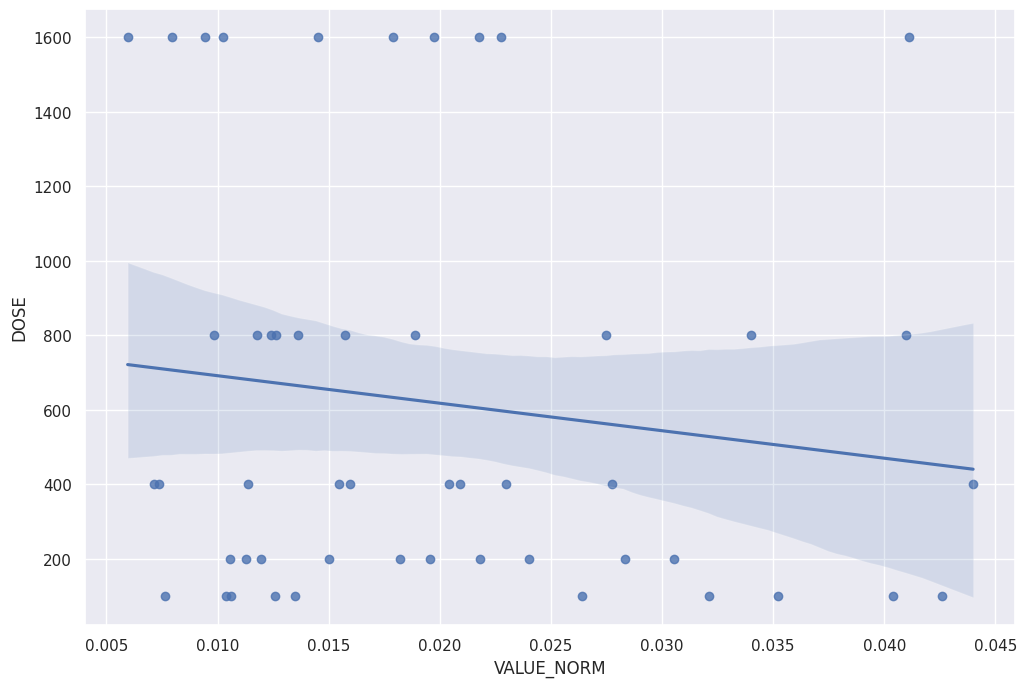

In [118]:
sns.regplot(x="VALUE_NORM", y="DOSE", data=df3[df3["PARAM"]=="C_max"])

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object